In [ ]:
### Quantum computation fundamentals
### it is based on Qiskit (Quantum Information Science Kit)
### https://qiskit.org/

## install Qiskit via pip if you haven't already
# pip install qiskit   - pip should be run in your terminal (not in this script)
## to install pip download get-pip.py from https://bootstrap.pypa.io/get-pip.py
## and run: python get-pip.py

## these content would put on a repository with the name 'QuantumComputationQiskit
## you can clone/download it from 
# "https://github.com/ahmad-shafiei/QuantumComputationQiskit.git"

### here I follow a book named "Learn Quantum Computing with Python and IBM Quantum"
### by Robert Loredo - 
### "github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition"


### Main Qiskit libraries or components:
### Model developers
### algorithms developers
### kernel developers

### Simulator available in Qiskit:
### Aer: pip install qiskit-aer
### Basic simulator for small circuits
# Aer's categories:
## AerProviders: the main class that contains all the simulators


## Qassimulators: the actual simulators for methods and operations
# - capabilitues and methods such as `statevector`, `density_matrix`, 
# `density_matrix`, `stabilizer`, `matrix_product_state`, `stabilizer`,
#  `matrix_product_state`. 

## StatevectorSimulator: provides the final state vector of a quantum circuit 
# without the measurement operation
# various visualizations: histogram, bloch sphere, cityscape, pauli vectors, hinton, etc.

## UnitarySimulator: simulates unitary matrices


## Pulse: simulates pulse-level control of quantum devices

#------------------------------------------------------------------
#------------------------------------------------------------------
# Installing Anaconda (recommended)
#------------------------------------------------------------------
#------------------------------------------------------------------
### Anaconda is a distribution of Python and R for scientific computing and data science.
### It simplifies package management and deployment. can create virtual environments.
### It comes with a lot of pre-installed libraries, including Qiskit.
### Download Anaconda from https://www.anaconda.com/products/distribution
# create a new environment for Qiskit
# conda create -n qcomputing
# conda info --envs    : lists all environments
# activate the environment: conda activate qcomputing
# pip install qiskit  # or conda install -c conda-forge qiskit
### To deactivate the environment: conda deactivate
#------------------------------------------------------------------
#------------------------------------------------------------------
# Configure current environment for Qiskit
# the IBM Quantum Experience account is required to access IBM quantum computers
# have token ID from IBM: https://quantum-computing.ibm.com/
# install required packages:
# pip install qiskit-ibm-runtime
# pip install qiskit[visualization]

# obtain API token from IBM : https://quantum.cloud.ibm.com/
# -----------------------------------------------------------------
# launch Jupyter notebook: `jupyter notebook`




In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save IBM quantum account to allow you to use sytems: (Run this command once!)
QiskitRuntimeService.save_account(channel='ibm_quantum_platform',
                                  token = 'tmONhjNiLKADCKCh0DhALluyhoZLos7pEONRjgsMtgSn', set_as_default=True)

In [ ]:
# Quantum Computation laverage three quantum computing principles:
# 1. Superposition: a quantum state can be a linear combination of multiple states
# 2. Interference: quantum states can add together (constructively or destructively)
# 3. Entanglement: quantum states of two particles can be linked, so any measurement on one affects the other

# Visualizing quantum states for a single qubit:
# - Bloch sphere: a sphere with radius 1, representing all possible quantum states of a qubit
# qubit has two orthogonal states on the poles : |0> = [1 0](north pole) and |1> = [0 1](south pole)
# any state can be represented as a point on the sphere 








In [11]:
# %run helper_file_1.0.ipynb

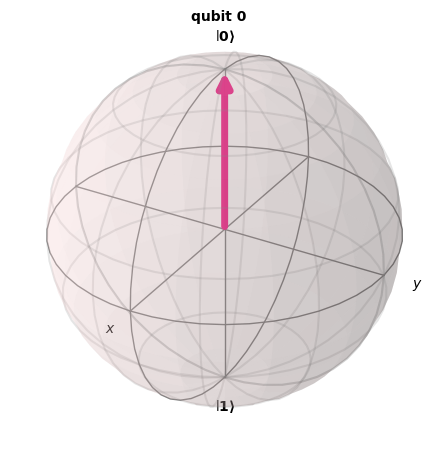

In [30]:
from qiskit import QuantumCircuit, ClassicalRegister

# create a simple circuit
qc = QuantumCircuit(1,1)    # 1 qubit and 1 classical bit

# qc.x(0)
# get the state vector from the circuit
stateVectorResult = Statevector(qc)

# display the state vectoir on Bloch sphere
plot_bloch_multivector(stateVectorResult)


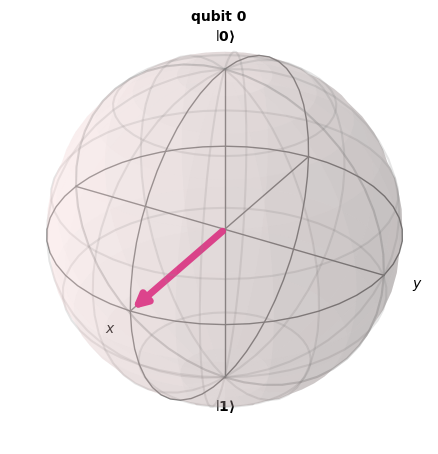

In [31]:

qc.h(0)      ## H|0> = |+> , H|1> = |->

qc.draw('mpl')    # get a nicer visualization --> pip install qiskit[visualization]

# get the state vector from the circuit
stateVectorResult = Statevector(qc)

# display the state vectoir on Bloch sphere
plot_bloch_multivector(stateVectorResult)

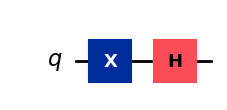

In [37]:
qc1 = QuantumCircuit(1)

qc1.x(0)   # flop gate

qc1.h(0)   # Hadamard gate


# display circuit 

qc1.draw('mpl')

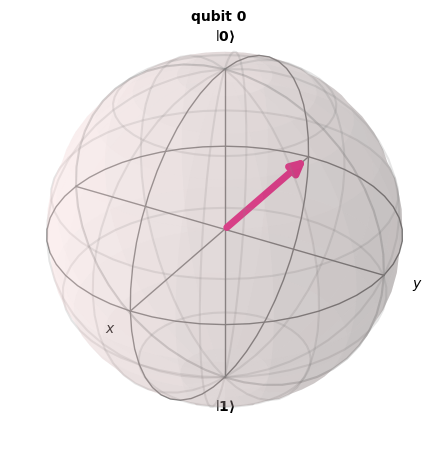

In [38]:
stateVectorResult1 = Statevector(qc1)

plot_bloch_multivector(stateVectorResult1)

In [39]:
# Recreate the circuit with a single qubit and classical bit
qc = QuantumCircuit(1,1)
# Add a Hadamard gate
qc.h(0)

In [40]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.providers.fake_provider import GenericBackendV2

def create_circuit(num_qubits, add_measurements):

    # Create a circuit with classical control
    meas = ClassicalRegister(num_qubits)
    qc = QuantumCircuit(num_qubits)
    qc.add_register(meas)
    if add_measurements:
        for i in range(num_qubits):
            qc.measure(i, meas[i])
 
    # Define backend with custom basis gates
    #backend = GenericBackendV2(
     #   num_qubits=num_qubits,
     #   basis_gates=["ecr", "id", "rz", "sx", "x"],
     #   control_flow=True,
    #)
 
    return qc

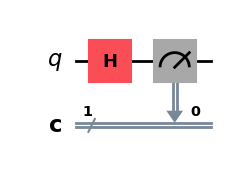

In [45]:
# Create a measurement circuit with 1 qubit and 1 bit
measurement_circuit = create_circuit(1,True)  # return a qc with measurement
# Concatenate the circuits together
full_circuit = qc.compose(measurement_circuit)
# Draw the full circuit
full_circuit.draw(output='mpl')

In [51]:
# Execute circuit on the Basic Aer qasm simulator
def simulate_on_sampler(qc, backend, options):

    # Construct an ideal simulator with Sampler 
    from qiskit.primitives import StatevectorSampler
    sampler = StatevectorSampler()

    # Transpile circuit
    pm = generate_preset_pass_manager(optimization_level=1)
    transpiled_qc = pm.run(qc)

    # Run using sampler
    state_vector_result = sampler.run([qc])
    
    result = state_vector_result.result()
    
    return transpiled_qc, result, state_vector_result
#====================================================


transpiled_QC, result, stateVectorResult = simulate_on_sampler(full_circuit, None, None)
counts = result[0].data.c.get_counts()
print(counts)

{'0': 484, '1': 540}


In [ ]:
# Entangelement: a quantum state of two quantum particles can be linked
# so any measurement on one effects the other
# Example: Bell state |00> + |11>

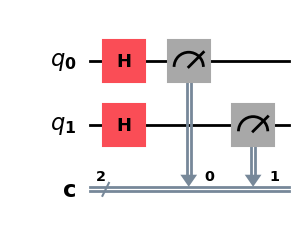

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(2,2)

qc.h(0)
qc.h(1)

qc.measure([0,1],[0,1])
qc.draw('mpl')

In [34]:
# Execute circuit on the Basic Aer qasm simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def simulate_on_sampler(qc, backend, options):

    # Construct an ideal simulator with Sampler 
    from qiskit.primitives import StatevectorSampler
    sampler = StatevectorSampler()

    # Transpile circuit
    pm = generate_preset_pass_manager(optimization_level=1)
    transpiled_qc = pm.run(qc)

    # Run using sampler
    state_vector_result = sampler.run([qc])
    
    result = state_vector_result.result()
    
    return transpiled_qc, result, state_vector_result

# Run the quantum circuit
transpiledQC, result, stateVectorResult = simulate_on_sampler(qc,None, None)

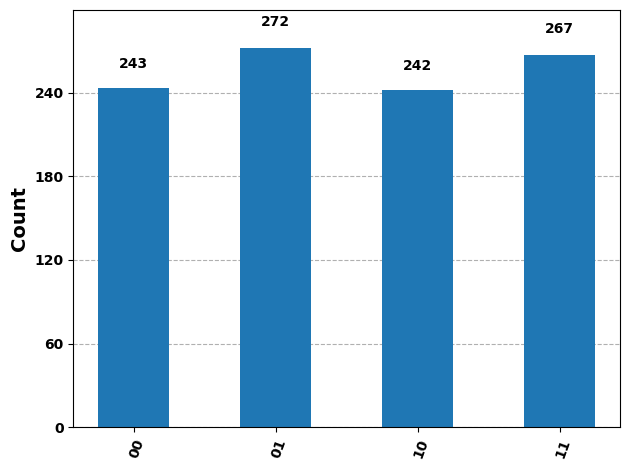

In [35]:
#Obtain the results and display on a histogram
counts = result[0].data.c.get_counts()
plot_histogram(counts)